# Проект: Исследование стартапов

- Автор: Федотова Инна Александровна
- Дата: 18.02.2025

## Введение

**Цель**: 
Провести исследовательский анализ исторического рынка стартапов, для разработки модели бизнеса по покупке, развитию и последующей перепродажи перспективных стартапов. Для этого необходимо изучить предоставленные данные, провести их обработку и решить задачи проекта.

**Основные задачи проекта**: 
1. Знакомство с данными и первичная обработка
- *Вывод общей информации, исправления названий столбцов*
- *Смена типов и анализ пропусков*
2. Предобработка данных и предварительное исслдование
- *Как менялись раунды финансирования по годам?*
- *Есть ли зависимость между размером компании и количеством образованных сотрудников?*
- *Можно ли использовать для объединения таблиц столбцы с одинаковым названием?*
- *Какая причина возникновения большого количества пропусков в датасете company_and_rounds.csv? Преобразовать датасет в вид удобный для анализа.*
3. Исследовательский анализ объединенных таблиц
- *Объединить датасет company_and_rounds с другими, для дальнейшего анализа*
- *Какой типичный и аномальный размер средств предоставлялся компаниям?*
- *Анализ компаний, купленных за 0 или 1 доллар, с ненулевым финансированием.*
- *Выделить стартапы, с наибольшими ценамии и наибольшим разбросом цен за стартап.*
- *Сколько в среднем раундов финансирования проходило для стартапов перед покупкой, в зависимости от статуса стартапа?*
4. Итоговый вывод и рекомендации




## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Для анализа используем данные из датасетов::

**acquisition.csv** - cодержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании (стартапа).
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

**company_and_rounds.csv** - содержит информацию о компаниях и раундах финансирования:
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов (раунды инвестирования, помогают стартапу развиваться на различных стадиях, кроме первоначальных).
- `funding rounds` — число раундов финансирования (раунды финансирования, помогают стартапу превратить идею в прототип или минимально жизнеспособный продукт).
- `funding total` — общая сумма финансирования за все раунды.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования одного раунда.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

Датасеты acquisition и company_and_rounds   связаны по столбцам `acquired_company_id` и `company ID`

**investment.csv** - содержит информацию о раундах инвестирования:
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

Датасеты company_and_rounds и investment  связаны по  столбцам  `company ID` и `company_id`

**fund.csv** - содержит информацию о фондах:
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

Датасеты fund и investment связаны по столбцам `id` и `fund_id`

**people.csv** - содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях. 

**education.csv** - содержит информацию об образовании сотрудника:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

Датасеты people и education связаны по столбцам `id` и `person_id`

**degrees.csv** - содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

Датасеты degrees и education связаны по столбцам `object_id` и `person_id`


### 1.1. Вывод общей информации, исправление названия столбцов


* Загрузим все данные по проекту.


* Проверим названия столбцов.


* Выведем информацию, которая необходима нам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
!pip install matplotlib-venn -q

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Импортируем библиотеки
import pandas as pd
import missingno as msno

# Загружаем библиотеки для визуализации данных
from matplotlib_venn import venn2, venn3 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Скроем вывод предупреждений
import warnings
warnings.simplefilter("ignore")

In [5]:
# Выгружаем данные 
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')


In [6]:
#Смотрим информацию по датафрейму с покупками одних компаний другими
acquisition_df.info()
acquisition_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [7]:
#Выводим 5 последних строк 
acquisition_df.tail()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12
9406,10529,53,92846,NaN,42600000,2013-12-12


 В датафрейме acquisition о покупках одними компаниями, других компаний 9407 строк и 6 столбцов.  Названия столбцов корректные. Типы данных: int64(4), object(2), что соответствует действительности, кроме столбца acquired_at, он хранит дату операции покупки. Тип данных нужно поменять, если нам предстоит с ним работать. В стобце term_code (вариант расчета) заполненных строк всего 1831.

In [8]:
#Смотрим информацию по датафрейму с раундами финансирования
company_and_rounds_df.info()
company_and_rounds_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
company_and_rounds_df.tail()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0
217773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57063.0,284191.0,2013-12-04,venture,7000000.0,0.0,4.0,1.0,1.0


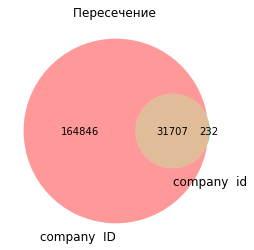

In [10]:
#Потроим диаграмму Венна, чтобы проверить насколько совпадают значения столбцов с одинаковым названием и их распределение по количеству
first_id = set(company_and_rounds_df['company  ID'].dropna().unique())
second_id = set(company_and_rounds_df['company  id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

В датафрейме company_and_rounds_df 217774 строк и 22 столбца. Названия столбцов нужно привести к единому виду snake case. Типы данных: float64(12), object(10). Нужно перевести в формат даты столбцы founded at, funded at и closed at (даты инвестирования, финансирования и закрытия). Во многих столбцах более 50% пропусков.
Интересно, что в датафрейме 2 столбца под названием company Id. Дополнительно, с помощью диаграммы Венна мы проверили, насколько они совпадают, почти все значения этих столбцов совпадают. При этом, в первом столбце 217472 неуникальных значений, во втором - 52928.


In [11]:
#Посмотрим датафрейм с раундами инвестирования
investment_df.info()
investment_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


В датафрейме investment_df о раундах инвестирования - 61403 строк и 4 столбца.  Названия столбцов корректные. Типы данных: int64(4). Пропусков нет. Во всех столбцах числовые данные.

In [12]:
#Проверим информацию в датафрейме о фондах
fund_df.info()
fund_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


В датафрейме fund_df о фондах - 11652   строк и 9 столбцов.  Названия столбцов корректные. Типы данных: int64(4), object(5). В столбце founded_at хранится дата создания фонда, при необходимости, нужно будет сменить тип данных. В 5 столбцах есть пропуски.

In [13]:
#Посмотрим  датафрейм с информацией об образовании сотрудника
education_df.info()
education_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [14]:
education_df.tail()

,id,person_id,instituition,graduated_at
109605,109606,268589,American Institute of Certtified Public Accoun...,NaN
109606,109607,268527,South China University of Technology,NaN
109607,109608,268527,Clarkson University,NaN
109608,109609,268528,Colorado State University,NaN
109609,109610,268528,University of San Diego School of Law,NaN


В датафрейме education_df об образовании сотрудника - 109610  строк и 4 столбца.  Названия столбцов корректные. Типы данных: int64(2), object(2). В столбце graduated_at хранится дата получения образования, при необходимости, нужно будет сменить тип на дату. 50% пропусков в этом же столбце - graduated_at  

In [15]:
#Посмотрим датафрейм о типе образования сотрудника
degrees_df.info()
degrees_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [16]:
degrees_df.tail()

,id,object_id,degree_type,subject
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering
109609,109610,p:268528,J.D.,NaN


В датафрейме degrees_df о типе образования сотрудника - 109610  строк и 4 столбца.  Названия столбцов корректные. Типы данных: int64(1), object(3), что соответствует действительности. Пропуски есть в стобцах degree_type и subject (тип образования, специальность). 

Интересно, что количество строк в этом сете и предыдущем одинаковое. Судя по первым и последним строчкам person_id и object_id совпадают (не учитывая p:), как и id/id. Из этого можно сделать вывод, что данные о типе образования, есть только у сотрудников, у которых есть образование по данным education

In [17]:
#Посмотрим датафрейм о сотрудниках
people_df.info()
people_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


В датафрейме people_df о сотрудниках - 226709 строк и 5 столбцов.  Названия столбцов корректные. Типы данных: float64(1), int64(1), object(3), что соответствует действительности. Пропуски есть в 4 столбцах. Данных о сотрудниках в 2 раза больше, чем данных об образовании сотрудников.

### 1.2. Смена типов и анализ пропусков

* Обработаем типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.


* Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

In [18]:
# Выводим название всех столбцов датафрейма company_and_rounds_df
display(company_and_rounds_df.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [19]:
#Отредактируем названия столбцов в датафрейме company_and_rounds_df
company_and_rounds_df.columns = company_and_rounds_df.columns.str.replace('  ', '_').str.replace('company_id','c_id').str.lower()

In [20]:
# Выводим новые названия столбцов датафрейма company_and_rounds_df
display(company_and_rounds_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'c_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [21]:
#Приведем столбцы с датой и временем к соответствующему типу
for column in ['founded_at', 'closed_at', 'funded_at']:
    company_and_rounds_df[column]=company_and_rounds_df[column].astype('datetime64[ns]')

In [22]:
#Уменьшим объем используемой памяти для столбцов с числами
for column in ['company_id', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'c_id', 'raised_amount','pre_money_valuation','participants','is_first_round','is_last_round']:
    company_and_rounds_df[column]=pd.to_numeric(company_and_rounds_df[column], downcast='float', errors='coerce')

In [23]:
import numpy as np

def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    '''
    Function optimizes memory usage in dataframe
    df: pd.DataFrame - data table
    print_size: bool - display of optimization results
    return pd.DataFrame - amount of optimized memory
    '''
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df


company_and_rounds_df_optimize =  optimize_memory_usage(company_and_rounds_df)

Размер использования памяти: до 26.58 Mb - после 26.58 Mb (0.0%)


In [24]:
#Проверим изменения
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float32       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

- Изменили названия столбцов, а также скорректировали тип данных для датафрейма company_and_rounds_df

In [25]:
# Выводим количество пропущенных строк в датафрейме
company_and_rounds_df.isna().sum()

company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
c_id                   164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [26]:
# Подсчитываем процент строк с пропусками
round(company_and_rounds_df.isna().mean()*100)

company_id              0.0
name                    0.0
category_code          34.0
status                  0.0
founded_at             50.0
closed_at              98.0
domain                 32.0
network_username       56.0
country_code           50.0
investment_rounds       0.0
funding_rounds          0.0
funding_total           0.0
milestones              0.0
funding_round_id       76.0
c_id                   76.0
funded_at              76.0
funding_round_type     76.0
raised_amount          76.0
pre_money_valuation    76.0
participants           76.0
is_first_round         76.0
is_last_round          76.0
dtype: float64

<AxesSubplot:>

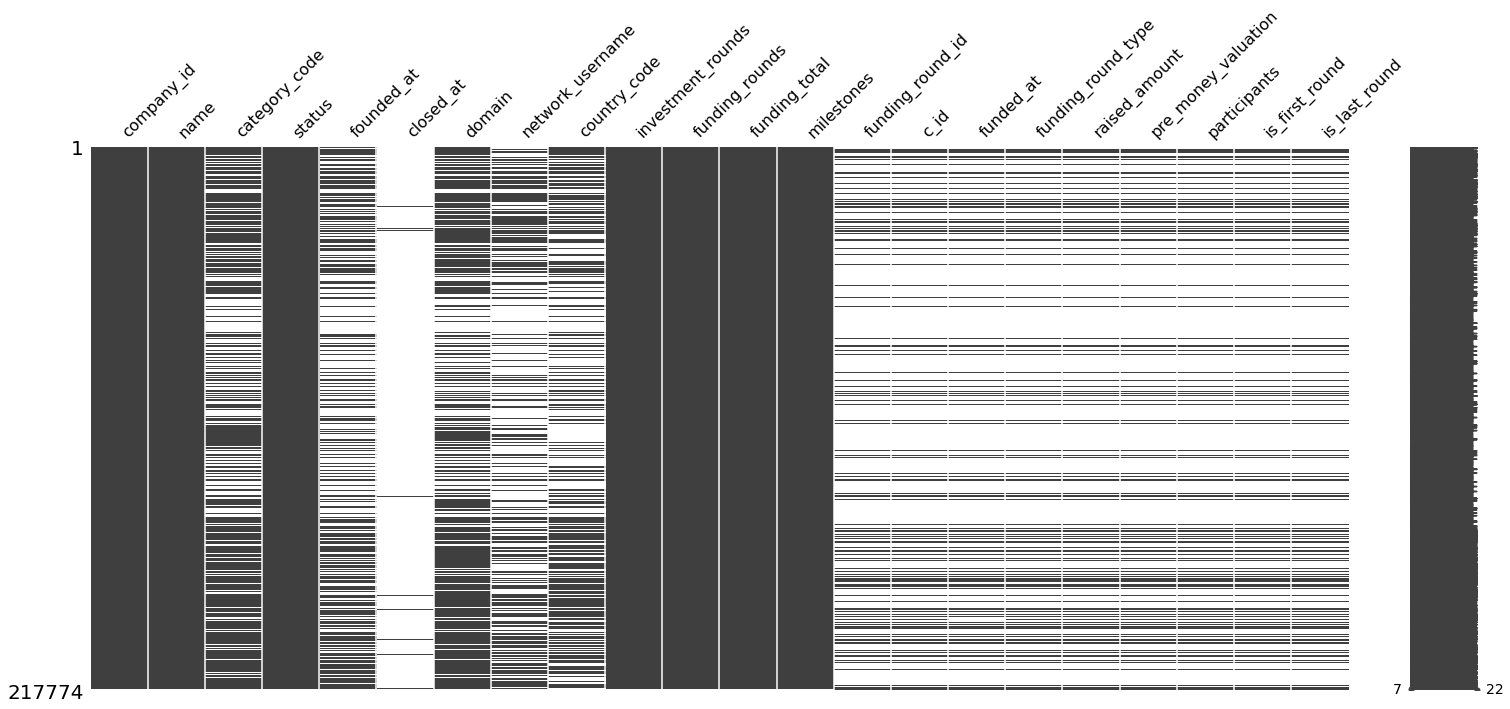

In [27]:
#Визуализируем пропуски в датафрейме company_and_rounds_df
msno.matrix(company_and_rounds_df) 


<AxesSubplot:>

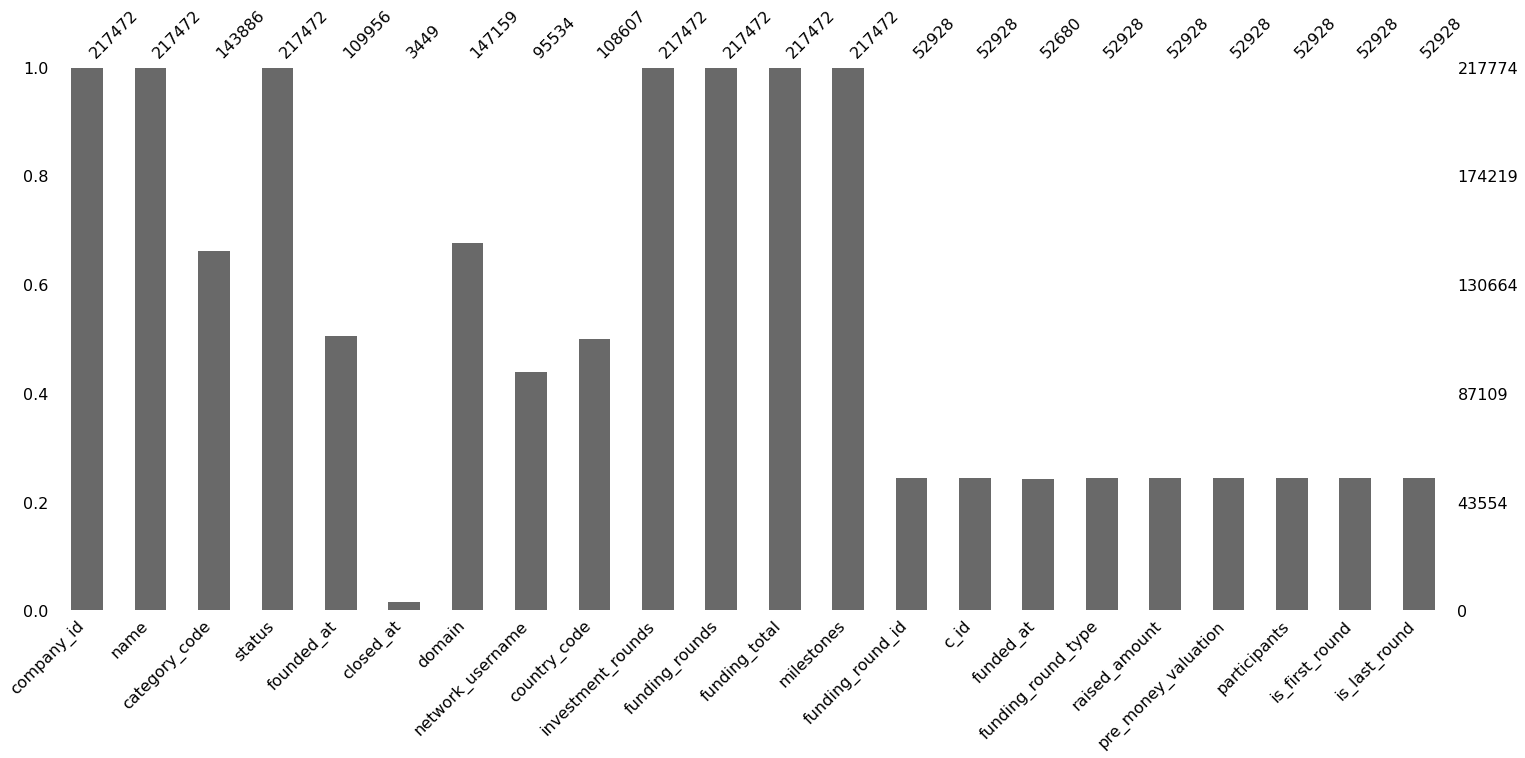

In [28]:
msno.bar(company_and_rounds_df) 


<AxesSubplot:>

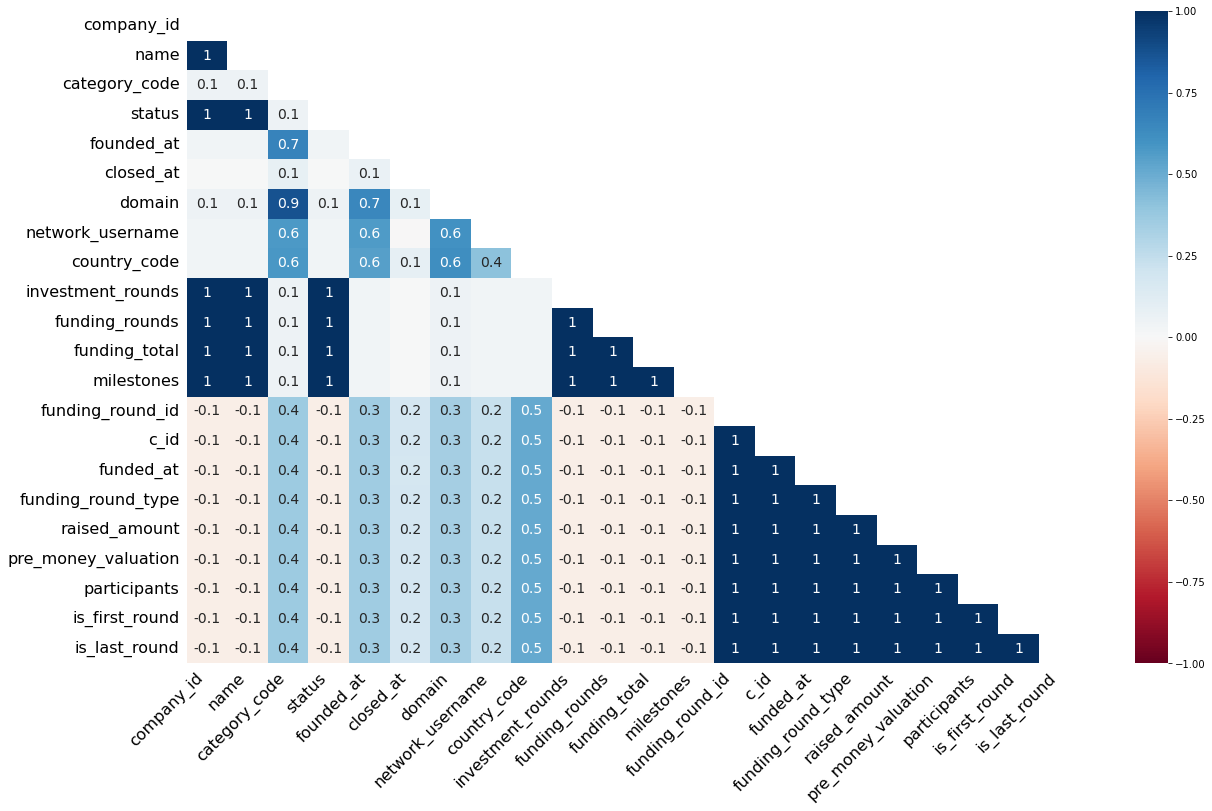

In [29]:
msno.heatmap(company_and_rounds_df)

Интересно, что в датафрейме довольно много пропусков. Самый большой процент 98% в столбце с датой закрытия компании, пропуски в таком столбце могут говорить о том что компания не закрылась или об этом не было информации на этапе сбора данных. 

Любопытно распределены пропуски в правой части таблицы, начиная со столбца funding_round_id и до столбца is_last_round их одинаковое количество - 76%, а также, как видим на визуализациях одинаковый объем данных. Есть гипотеза, что эти данные присоединили позже остальных, используя объединение без потери данных. 

Нас интересуют пропуски в столбцах, которые будут использоваться для анализа. Например, столбец с датой финансирования funded_at Процент пропусков 76%, и нет информации о том, чем их заполнить. Соответственно будем работать с 52 000 строк при анализе задачи 3.1

In [30]:
#Теперь поменяем тип данных даты в датасете с образованием
education_df['graduated_at']=pd.to_datetime(education_df['graduated_at'])
#Проверим изменения:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


<AxesSubplot:>

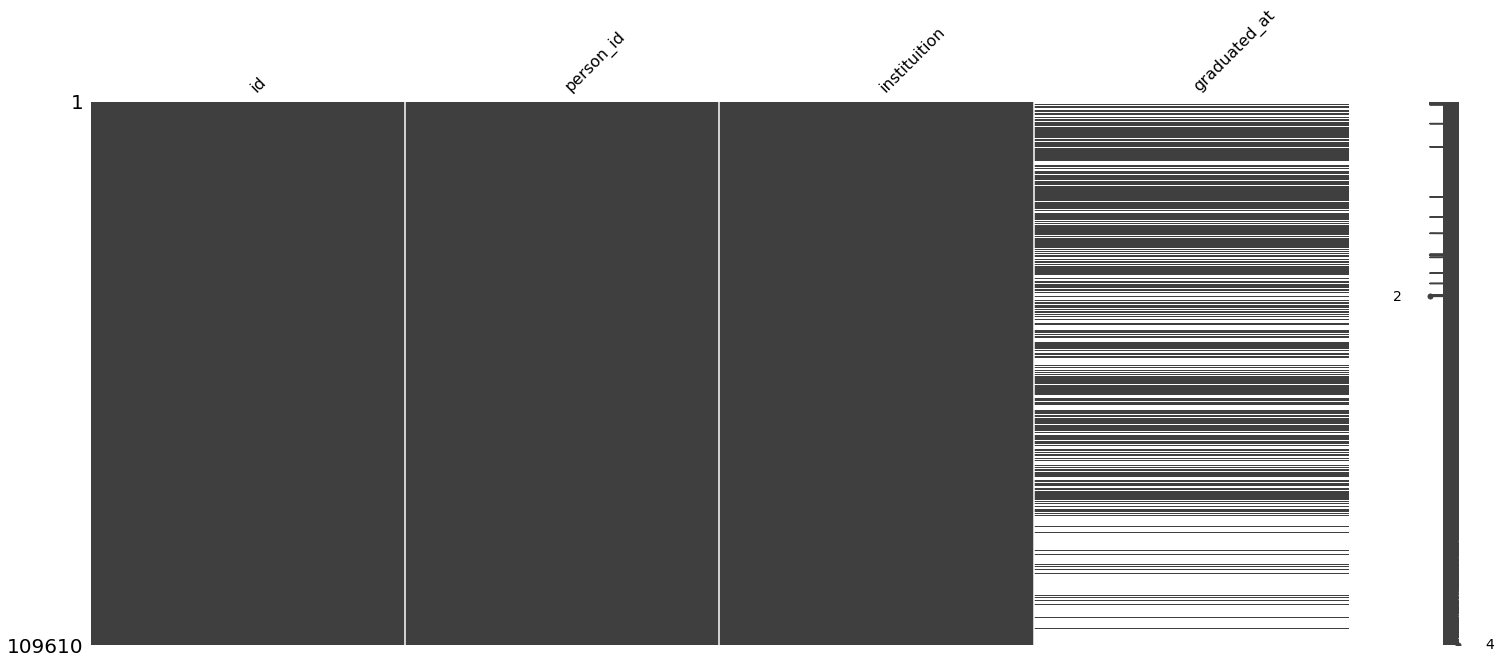

In [31]:
#Визуализируем пропуски в education_df
msno.matrix(education_df) 


Видим, что довольно много пропусков в графе с датой окончания учебного заведения. Это важно, в случае, если для анализа будем считать сотрудников, только окончивших учебное заведение.

<AxesSubplot:>

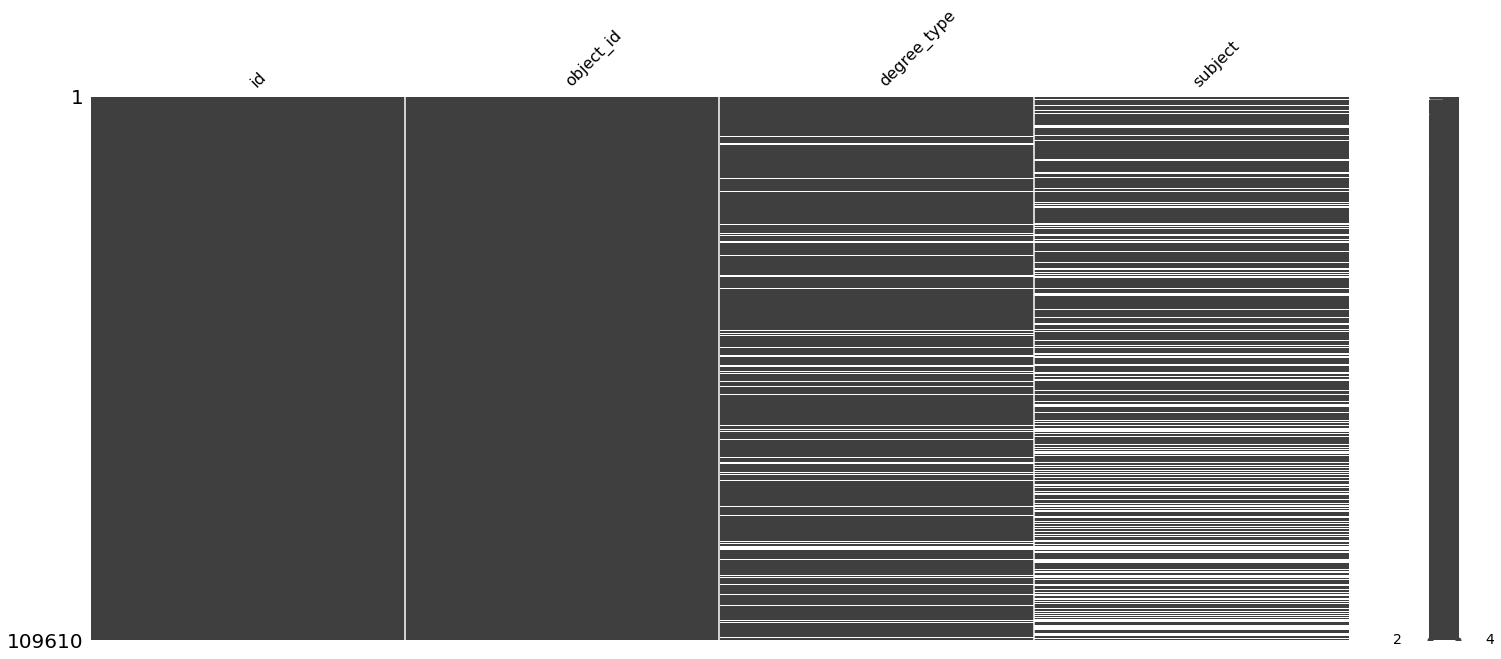

In [32]:
#Визуализируем пропуски в degrees_df
msno.matrix(degrees_df) 


Количество строк в этом датасете и предыдущем одинаковое, а вот заполненных строк со значением degree_type тип образования - гораздо больше, чем строк с датой окончания учебного заведения. Это может говорить о том, что у сотрудника уже есть какой-то тип образования. Так как нет других вводных, можем считать сотрудника образованным, если у него есть дата окончания вуза или заполнен тип образования.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Выполним задание без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответим на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [33]:
#Извлечем год из даты и создадим новый столбец
company_and_rounds_df['year']=company_and_rounds_df['funded_at'].dt.strftime('%Y')
#Проверим новый столбец
company_and_rounds_df[['funded_at','year']].head()

,funded_at,year
0,2005-10-01,2005
1,2007-01-01,2007
2,2008-05-19,2008
3,NaT,NaN
4,NaT,NaN


In [34]:
#Создадим сводную таблицу: группируем по годам, считаем медиану суммы финансирования 1 раунда и общее количество раундов за этот год
pivot=company_and_rounds_df.pivot_table(values='raised_amount', index='year', aggfunc=['median', 'count']).reset_index()

display(pivot)


,year,median,count
,,raised_amount,raised_amount
0,1960,0.0,9
1,1973,0.0,1
2,1974,0.0,2
3,1984,41000.0,3
4,1985,0.0,1
5,1987,1250000.0,2
6,1989,15000.0,1
7,1990,1000000.0,1
8,1992,2000000.0,1


In [35]:
#Отфильтруем таблицу, оставив только года, где раундов финансирования было более 50 
pivot=pivot.loc[pivot['count','raised_amount']>50]

display(pivot)

,year,median,count
,,raised_amount,raised_amount
15,1999,2000000.0,76
16,2000,4200000.0,125
17,2001,3000000.0,96
18,2002,4200000.0,116
19,2003,3000000.0,159
20,2004,5000000.0,291
21,2005,5500000.0,1633
22,2006,5000000.0,2436
23,2007,3973320.0,3279


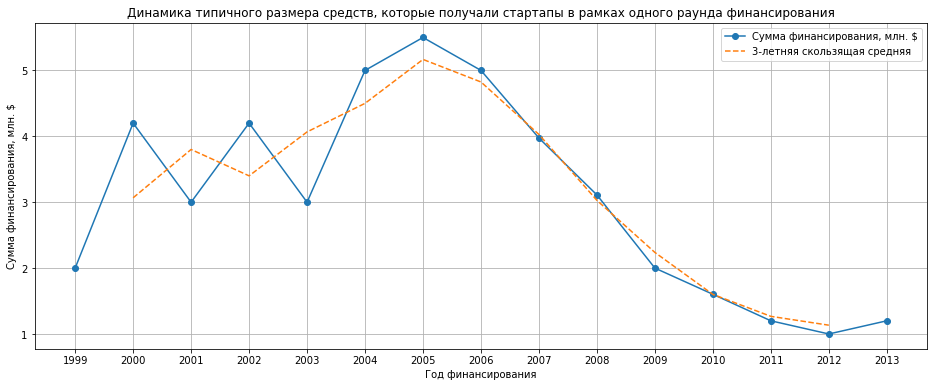

In [36]:
#Построим график для отражения динамики типичной суммы финансирования 1 раунда по годам
pivot['median','raised_amount']=pivot['median','raised_amount']/1000000

#Посчитаем скользящую среднюю по годам
size=3
pivot['rolling mean']=pivot['median','raised_amount'].rolling(window=size,center=True).mean()

plt.figure(figsize=(16,6))
plt.plot(pivot['year'], 
         pivot['median','raised_amount'],
         label='Сумма финансирования, млн. $', 
         marker='o')
plt.plot(pivot['year'],
        pivot['rolling mean'],
        label=f'{size}-летняя скользящая средняя',
        linestyle='--')

plt.xlabel('Год финансирования')
plt.ylabel('Сумма финансирования, млн. $')
plt.title('Динамика типичного размера средств, которые получали стартапы в рамках одного раунда финансирования')
plt.legend()
plt.grid(True)
plt.show()

      

Максимальная сумма финансирования одного раунда зафиксирована в 2005 году - 5 500 000. После этого сумма финансирования пошла на спад и с каждым годом становилась все меньше. Минимальная сумма зафиксирована в 2012 году - 1 000 000. Начиная с 2010 года, сумма финансирования одного раунда стала меньше, чем была в 1999. При этом нужно учитывать, что количество финансовых раундов возросло в разы, если в 1999 году их было 76, в 2005 - 1633, то в 2013 их стало 11072. Вероятно, это связано с потребностью снижения рисков. Раундов финансирования становится больше, а сумма - меньше, чтобы можно было прекратить финансирование на ранних этапах, в случае неуспешного стартапа. Также можно утверждать, что к финансированию стартапов появился интерес, из-за чего количество раундов возросло в разы.


### 2.2. Люди и их образование

Нужно понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуем выбранные границы групп.

* Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [37]:
#Объединим таблицы people и education по левому типу, чтобы сохранить данные обо всех сотрудниках

employee_df=people_df.merge(education_df, left_on='id', right_on='person_id',suffixes = ('_people','_education'), how='left')
employee_df.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [38]:
#К получившемуся датафрейму присоединим degress, для этого надо привести поле object_id к нужному виду
degrees_df['object_id']=degrees_df['object_id'].str.replace('p:','')
degrees_df['object_id']=pd.to_numeric(degrees_df['object_id'], downcast='float', errors='coerce')
degrees_df.head()


,id,object_id,degree_type,subject
0,1,6117.0,MBA,NaN
1,2,6136.0,BA,"English, French"
2,3,6136.0,MS,Mass Communication
3,4,6005.0,MS,Internet Technology
4,5,5832.0,BCS,"Computer Science, Psychology"


In [39]:
#теперь присоединяем
employee_df=employee_df.merge(degrees_df, left_on='person_id', right_on='object_id', how='left')

employee_df.info()
employee_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         370836 non-null  int64         
 1   first_name        370831 non-null  object        
 2   last_name         370835 non-null  object        
 3   company_id        70869 non-null   float64       
 4   network_username  81529 non-null   object        
 5   id_education      212198 non-null  float64       
 6   person_id         212198 non-null  float64       
 7   instituition      212109 non-null  object        
 8   graduated_at      113991 non-null  datetime64[ns]
 9   id                212198 non-null  float64       
 10  object_id         212198 non-null  float32       
 11  degree_type       190722 non-null  object        
 12  subject           156477 non-null  object        
dtypes: datetime64[ns](1), float32(1), float64(4), int64(1), obj

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [40]:
#Проверим созданный датафрейм на дубликаты
duplicates=employee_df.duplicated(subset=['id_people','first_name', 'last_name']).sum()
display(duplicates)

144128

In [41]:
#Удаляем явные дубликаты
employee_df_clean = employee_df.drop_duplicates(subset=['id_people','first_name', 'last_name'])
employee_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         226708 non-null  int64         
 1   first_name        226703 non-null  object        
 2   last_name         226707 non-null  object        
 3   company_id        34614 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_education      68071 non-null   float64       
 6   person_id         68071 non-null   float64       
 7   instituition      68031 non-null   object        
 8   graduated_at      36387 non-null   datetime64[ns]
 9   id                68071 non-null   float64       
 10  object_id         68071 non-null   float32       
 11  degree_type       61401 non-null   object        
 12  subject           50808 non-null   object        
dtypes: datetime64[ns](1), float32(1), float64(4), int64(1), obj

В вводных данных нет информации, кого из сотрудников считать образованными, по хорошему это нужно уточнить у заказчика. Например, Марк Цукенберг не закончил Гарвард, но можем ли мы считать его необразованным?

Для нашего анализа будем считать, что сотрудник с образованием, это тот у кого есть дата окончания обучения или заполнен тип образования. Как видим из таблицы выше, это сильно повлияет на наш анализ. Так как в дате окончания вуза всего 36 тысяч записей, а в типе образования 68 тысяч, и это при том, что всего данных о сотрудниках 226 тысяч.

In [42]:
#Создадим новый столбец с признаком образования 0 - необразованный сотрудник, 1 - образованный
employee_df_clean['is_educated']=0
employee_df_clean.loc[employee_df_clean['graduated_at'].notna() | employee_df_clean['degree_type'].notna(), 'is_educated']=1
employee_df_clean.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,id,object_id,degree_type,subject,is_educated
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science,0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0


In [43]:
employee_df_clean.tail()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,id,object_id,degree_type,subject,is_educated
370831,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
370832,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01,25958.0,174088.0,M.B.B.S.,Medicine,1
370833,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01,18871.0,118386.0,PhD,Journalism,1
370834,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
370835,178190,Alex,Smith,NaN,esocialnetlike,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0


In [44]:
#Группируем по компаниям и считаем количество всех сотрудников и сотрудников с образованем в каждой компании

group_df= employee_df_clean.groupby('company_id')['is_educated'].agg(['count','sum']).sort_values('count', ascending=False).reset_index()
display(group_df)

,company_id,count,sum
0,59.0,244,163
1,29.0,150,107
2,1242.0,138,98
3,231067.0,72,51
4,499.0,63,41
...,...,...,...
22916,63585.0,1,0
22917,7258.0,1,1
22918,63581.0,1,0
22919,63580.0,1,1


По данным из открытых источников компании делятся на:
- Микропредприятие - до 15 человек
- Малое предприятие	- от 16 до 100 человек
- Среднее предприятие - от 101 до 250 человек
- Крупное предприятие - от 250 человек.

Применим такое распределение, как устойчивое и общепринятое, для наших расчетов, не смотря на то что по нашим данным отсутствуют крупные предприятия. Также добавим отдельную категорию для компаний с 1 человеком, так как для начинающего стартапа такое имеет место быть, но для групп выше это может исказить общую картину, назовем ее - Начинающее предприятие

In [45]:
def categories(x):
  if x['count']>100:
    return 'Среднее предприятие'
  elif 100>=x['count']>15:
    return 'Малое предприятие'
  elif 15>=x['count']>1:
    return 'Микропредприятие'
  else:
    return 'Начинающее предприятие'    

#Создаем новый столбец, значения в котором заполняем построчно с помощью функции выше
group_df['company_category']=group_df.apply(categories, axis=1)

group_df['perc']=round(group_df['sum']/group_df['count'],2)
display(group_df)

,company_id,count,sum,company_category,perc
0,59.0,244,163,Среднее предприятие,0.67
1,29.0,150,107,Среднее предприятие,0.71
2,1242.0,138,98,Среднее предприятие,0.71
3,231067.0,72,51,Малое предприятие,0.71
4,499.0,63,41,Малое предприятие,0.65
...,...,...,...,...,...
22916,63585.0,1,0,Начинающее предприятие,0.00
22917,7258.0,1,1,Начинающее предприятие,1.00
22918,63581.0,1,0,Начинающее предприятие,0.00
22919,63580.0,1,1,Начинающее предприятие,1.00


In [46]:
#Сделаем сводную таблицу, посчитаем долю сотрудников с образованием
company_category_df=group_df.pivot_table(values=['sum','count'], index='company_category', aggfunc='sum').reset_index()

company_category_df['percentage']= round(company_category_df['sum']/company_category_df['count'],2)

company_category_df=company_category_df.sort_values(by='percentage', ascending=False)
display(company_category_df)


,company_category,count,sum,percentage
3,Среднее предприятие,532,368,0.69
0,Малое предприятие,1236,749,0.61
2,Начинающее предприятие,18116,9339,0.52
1,Микропредприятие,14730,7148,0.49


По нашим подсчетам вышло, что чем крупнее компания, тем больше доля образованных сотрудников. При этом разброс всех значений в пределах 20%.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Проверим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [47]:
#Для изучения пересечений столбцов, будем строить диаграмму Венна, для этого подготовим сеты

user_company=set(company_and_rounds_df['network_username'].dropna().unique())
user_people=set(people_df['network_username'].dropna().unique())
user_fund=set(fund_df['network_username'].dropna().unique())

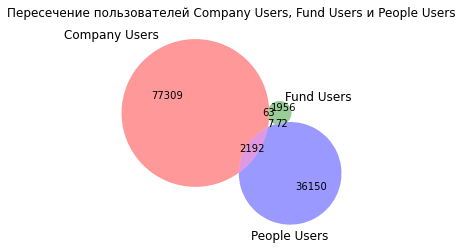

In [48]:
# Строим диаграмму Венна
venn3([user_company, user_fund, user_people], set_labels=('Company Users', 'Fund Users', 'People Users'))

# Отображаем график
plt.title("Пересечение пользователей Company Users, Fund Users и People Users")
plt.show()   


На графике наглядно видно, что пересечений очень маленькое количество. Здесь можем утверждать, что в столбцах с одинаковыми названиями, хранятся разные данные, в зависимости от датафрейма и объединять по таким столбцам нельзя.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Приведем данные в вид, который позволит проводить анализ в разрезе отдельных компаний. 

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Так как важно сохранить данные по компаниям и ранее мы выяснили, что датасет company_and_rounds_df был создан с помощью объединения таблиц, после которого появились дублирующие записи с идентификатором компании, содержащие сумму каждого раунда, то здесь мы разделим эти датасеты обратно.

In [49]:
#Посмотрим индексы столбцов для разьединения
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float32       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

In [50]:
#Разделим датафрейм на 2, по компаниям и по раундам финансирования
company_df=company_and_rounds_df.iloc[:,:13]
rounds_df=company_and_rounds_df.iloc[:,13:]
company_df.info()
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float32       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float32       
 10  funding_rounds     217472 non-null  float32       
 11  funding_total      217472 non-null  float32       
 12  milestones         217472 non-null  float32       
dtypes: datetime64[ns](2), float32(5), object(6)


In [51]:
#Посмотрим дубликаты датафрейма по компаниям
company_df.duplicated().sum()

21220

In [52]:
#Посмотрим дубликаты датафрейма по раундам
rounds_df.duplicated().sum()

164845

In [53]:
#Почистим дубликаты
company_df=company_df.drop_duplicates()
rounds_df=rounds_df.drop_duplicates()
#Проверим изменения
company_df.info()
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float32       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float32       
 10  funding_rounds     196553 non-null  float32       
 11  funding_total      196553 non-null  float32       
 12  milestones         196553 non-null  float32       
dtypes: datetime64[ns](2), float32(5), object(6)



## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

Далее будем работать только с этими данными.

In [54]:
#Отсортируем датафрейм по указанным условиям
company_df=company_df.loc[(company_df['funding_rounds']>0) | (company_df['investment_rounds']>0) | (company_df['status']=='acquired')]
company_df.info()
company_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float32       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float32       
 10  funding_rounds     40747 non-null  float32       
 11  funding_total      40747 non-null  float32       
 12  milestones         40747 non-null  float32       
dtypes: datetime64[ns](2), float32(5), object(6)
memory usage: 3.

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0


In [55]:
#Объединим компании с информацией о покупке одних компаний, другими
company_acquisition_df=company_df.merge(acquisition_df, left_on='company_id', right_on='acquired_company_id', how='left')
company_acquisition_df.info()
company_acquisition_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float32       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float32       
 10  funding_rounds        40890 non-null  float32       
 11  funding_total         40890 non-null  float32       
 12  milestones            40890 non-null  float32       
 13  id              

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.0,2005-05-29
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.0,2010-09-30



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратим внимание, например, на показатели, возвращаемые методом `.describe()`, — объясним их. Применимы ли к таким данным обычные способы нахождения типичных значений?

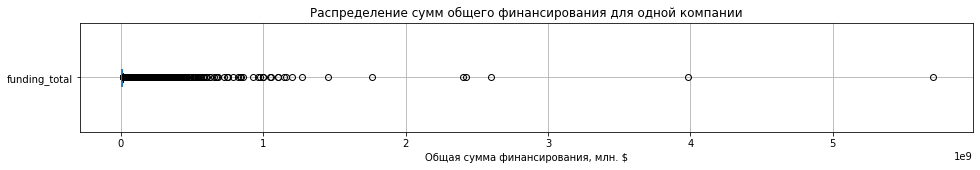

In [56]:
pd.options.display.float_format='{:.0f}'.format
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 2))

# Строим диаграмму размаха значений в столбце funding_total по отфильтрованному датафрейму
company_acquisition_df.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение сумм общего финансирования для одной компании')
plt.xlabel('Общая сумма финансирования, млн. $')

# Выводим график
plt.show() 

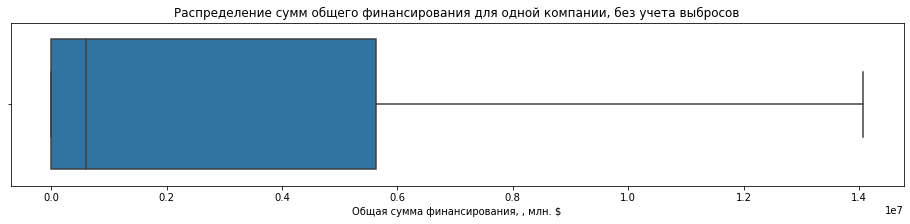

In [57]:

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(16, 3))

# Строим диаграмму размаха значений в столбце funding_total по отфильтрованному датафрейму
sns.boxplot(data=company_acquisition_df, x='funding_total', showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение сумм общего финансирования для одной компании, без учета выбросов')
plt.xlabel('Общая сумма финансирования, , млн. $')

# Выводим график
plt.show() 

In [58]:
round(company_acquisition_df['funding_total'].describe(),2)

count        40890
mean      10135725
std       56413976
min              0
25%              0
50%         600000
75%        5631320
max     5699999744
Name: funding_total, dtype: float64

Мы видим, что разброс значений достаточно большой. Минимальное финансирование `0$`, максимальное - `5,7 млрд $`, стандартное отклонение `56 млн $`. 25 процентиль нулевой. Типичные суммы общего финансирования сконцентрированы в промежутке от `0, до 0,6 млн$`. Нулевое финансирование это что-то из разряда фантастики, а таких значений достаточно много. С таким разбросом данных, достаточно сложно оценить реальное типичное значение.


### 3.3. Куплены забесплатно?

* Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделаем выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [59]:
#Отфильтруем датафрейм по компаниям, проданным за 0 или 1 доллар и суммой финансирования больше 0
company_acquisition_free=company_acquisition_df.loc[(company_acquisition_df['price_amount']<=1)&(company_acquisition_df['funding_total']>0)]

In [60]:
company_acquisition_free['funding_total'].describe()

count         1618
mean      18152954
std      144503264
min           3750
25%        2000000
50%        6000000
75%       15500000
max     5699999744
Name: funding_total, dtype: float64

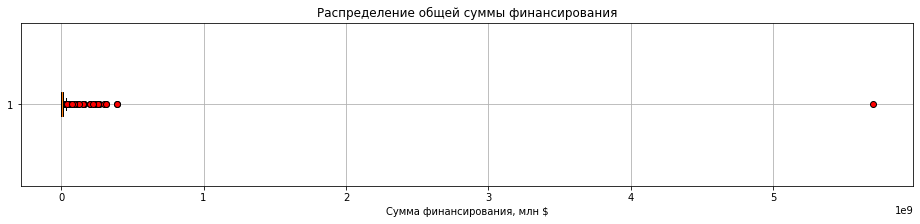

In [61]:
#company_acquisition_free['funding_total']=round(company_acquisition_free['funding_total']*1000000)
plt.figure(figsize=(16, 3))

plt.boxplot(company_acquisition_free['funding_total'],
            vert=False,  # Устанавливаем горизонтальную ориентацию
            flierprops=dict(markerfacecolor='r', marker='o'))  # Настраиваем вид выбросов (красные кружки)
# Добавляем заголовок диаграммы
plt.title('Распределение общей суммы финансирования')

# Добавляем подписи к оси X
plt.xlabel('Сумма финансирования, млн $')

# Добавляем сетку
plt.grid(True)
# Отображаем график
plt.show()

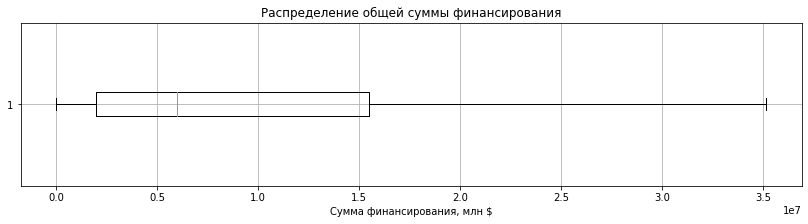

In [62]:
#Построим аналогичный график без выбросов

plt.figure(figsize=(14, 3))

plt.boxplot(company_acquisition_free['funding_total'],
            vert=False,  # Устанавливаем горизонтальную ориентацию
            showfliers=False)
plt.title('Распределение общей суммы финансирования')

# Добавляем подписи к оси X
plt.xlabel('Сумма финансирования, млн $')

# Добавляем сетку
plt.grid(True)
# Отображаем график
plt.show()

In [63]:
#Рассчитаем IQR, чтобы найти выбросы аналитически
Q1 = company_acquisition_free['funding_total'].quantile(0.25)
Q3 = company_acquisition_free['funding_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)

Нижняя граница: -18250000.0
Верхняя граница: 35750000.0


In [64]:
#Заменим нижнюю границу на 0.00375, что соответствует минимальному значению нашей выборки
lower_bound=0.00375
print("Нижняя граница:", lower_bound)

Нижняя граница: 0.00375


In [65]:
#Вычислим процентили, которым соответствуют границы
lower_percentile = (company_acquisition_free['funding_total'] < lower_bound).sum() / len(company_acquisition_free) * 100
upper_percentile = (company_acquisition_free['funding_total'] > upper_bound).sum() / len(company_acquisition_free) * 100

print(f"Нижняя граница соответствует {lower_percentile:.2f}% данных, которые ниже этой границы.")
print(f"Верхняя граница соответствует {upper_percentile:.2f}% данных, которые выше этой границы.")

Нижняя граница соответствует 0.00% данных, которые ниже этой границы.
Верхняя граница соответствует 9.09% данных, которые выше этой границы.


In [66]:
#Посчитаем какому значению соответствует верхний перцентиль и проверим можем ли установить нижний
company_acquisition_free['funding_total'].describe(percentiles=[0.0001, 0.9091])

count          1618
mean       18152954
std       144503264
min            3750
0.01%          3790
50%         6000000
90.91%     35159555
max      5699999744
Name: funding_total, dtype: float64

По нижней границе, можно не использовать перцентили для среза данных, так как в ней отсутствуют данные, для фильтрации имеет смысл просто указывать, что значение должно быть >0.
Для верхней границы подойдет 90,91 перцентиль, что соответствует значению `35,15 млн $` и соответствует визуализации диаграммы "ящика с усами". При этом, нужно учитывать, что основной массив данных сосредоточен в интервале `от 0,2 до 15,1 млн $`


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории, характеризующиеся:

* наибольшими типичными ценами;
* и наибольшим разбросом цен за стартап.



In [67]:
# Проверим уникальные значения в столбце category_code
display(company_acquisition_df['category_code'].nunique())

company_acquisition_df['category_code'].sort_values().unique()

42

array(['advertising', 'analytics', 'automotive', 'biotech', 'cleantech',
       'consulting', 'design', 'ecommerce', 'education', 'enterprise',
       'fashion', 'finance', 'games_video', 'government', 'hardware',
       'health', 'hospitality', 'legal', 'local', 'manufacturing',
       'medical', 'messaging', 'mobile', 'music', 'nanotech',
       'network_hosting', 'news', 'nonprofit', 'other', 'pets',
       'photo_video', 'public_relations', 'real_estate', 'search',
       'security', 'semiconductor', 'social', 'software', 'sports',
       'transportation', 'travel', 'web', nan], dtype=object)

В столбце с категориями есть довольно много проупсков, отфильтруем их

In [68]:
#Почистим датасет company_acquisition_df от пропусков в поле category_code и исключим нулевые покупки
company_category_df= company_acquisition_df.loc[(company_acquisition_df['category_code'].notna()&(company_acquisition_df['price_amount']>0))]
company_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 1 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1998 non-null   float32       
 1   name                  1998 non-null   object        
 2   category_code         1998 non-null   object        
 3   status                1998 non-null   object        
 4   founded_at            1389 non-null   datetime64[ns]
 5   closed_at             12 non-null     datetime64[ns]
 6   domain                1852 non-null   object        
 7   network_username      624 non-null    object        
 8   country_code          1819 non-null   object        
 9   investment_rounds     1998 non-null   float32       
 10  funding_rounds        1998 non-null   float32       
 11  funding_total         1998 non-null   float32       
 12  milestones            1998 non-null   float32       
 13  id               

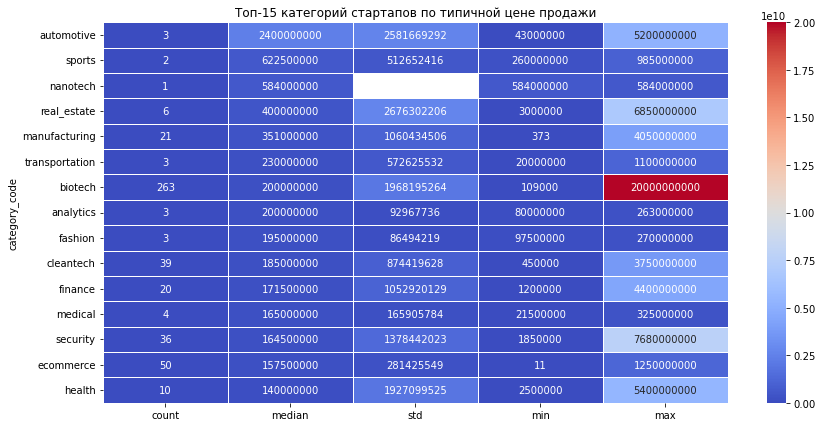

In [69]:
#Сгруппируем по категориям, посчитаем общую сумму, количество и медиану по полю цены покупки стартапа - price_amount
group_company_category=company_category_df.groupby('category_code')['price_amount'].agg(['count','median','std','min','max'])
group_company_category=group_company_category.sort_values('median', ascending=False)
top_15_median=group_company_category.head(15)

plt.figure(figsize=(14, 7))
sns.heatmap(data=top_15_median, annot=True, fmt='.0f',  linewidths=0.5, cmap='coolwarm')

plt.title('Топ-15 категорий стартапов по типичной цене продажи')
plt.show()


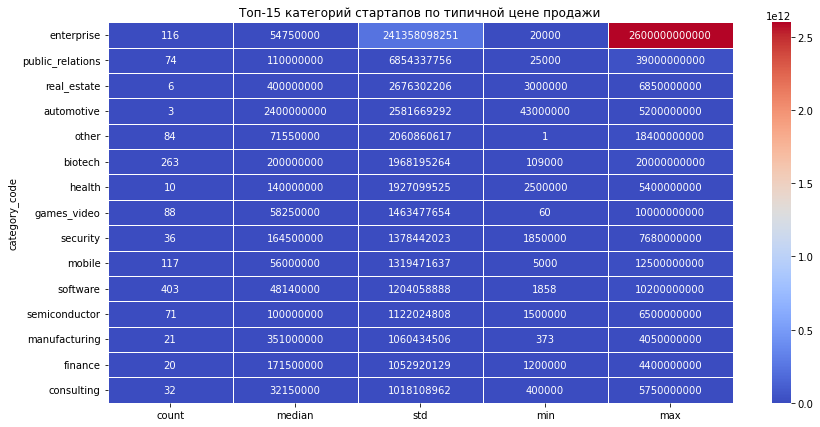

In [70]:
group_company_category=group_company_category.sort_values('std', ascending=False)
top_15_std=group_company_category.head(15)

plt.figure(figsize=(14, 7 ))
sns.heatmap(data=top_15_std, annot=True, fmt='.0f',  linewidths=0.5, cmap='coolwarm')

plt.title('Топ-15 категорий стартапов по типичной цене продажи')
plt.show()

Выбрали топ-15 категорий стартапов с наибольшей типичной ценой продажи и с наибольшим разбросом цен. Для подсчета типичной цены использовали медиану значений, так как разбросы по суммам достаточно большие, что сильно влияет на среднее значение. Для расчета разброса выбрали показатель стандартного отклонения, чем он больше, тем больше разброс цен. Также вывели такие показатели как, количество проданных стартапов, минимальная и максимальная сумма.

Топ-15 это достаточно много, но зато разброс цен достаточно высокий, если говорить о типичных ценах, то разброс от 2,4 млрд, до 140 млн., что позволит подобрать наиболее подходящий вариант. Также проверив сразу 2 топа, можно выделить категории, которые присутствуют сразу в обоих, такие как недвижимость, автомобили, биотехнологии и т.п.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [71]:
# Проверим уникальные значения в столбце category_code
display(company_acquisition_df['status'].nunique())

company_acquisition_df['status'].sort_values().unique()

4

array(['acquired', 'closed', 'ipo', 'operating'], dtype=object)

In [72]:
#Так как анлизируем количество раундов, то отфильтруем значения раундов равные 0
company_acquisition_df_filter=company_acquisition_df.loc[company_acquisition_df['funding_rounds']>0]

In [73]:
#Сгруппируем по статусу и посчитаем типичное значение и другие показатели количества раундов для каждого статуса 
status_group=company_acquisition_df_filter.groupby('status')['funding_rounds'].agg(['count','median','mean','min','max']).reset_index()
status_group=status_group.sort_values(by='mean', ascending=False)
display(status_group)

,status,count,median,mean,min,max
2,ipo,490,2,3,1,13
0,acquired,2641,1,2,1,12
3,operating,26535,1,2,1,15
1,closed,2089,1,1,1,8


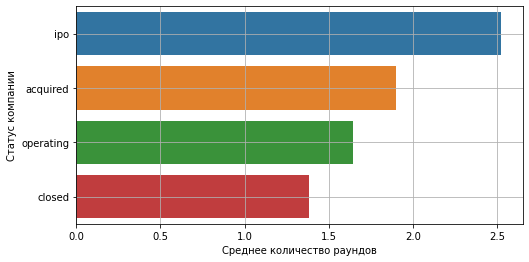

In [74]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 4))

# Строим линейчатую диаграмму
sns.barplot(data=status_group, x='mean', y='status')

#Настраиваем оформление графика
plt.xlabel('Среднее количество раундов')
plt.ylabel('Статус компании')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Типичное значение раундов перед продажей - 1, среднее количество раундов перед продажей - 2. Самое большое количество раундов у компаний в статусе ipo(первое публичное размещение акций).


## Шаг 4. Итоговый вывод и рекомендации

1. Знакомство с данными: загрузка и первичная предобработка.
Для проекта предоставлены данные 7 датафреймов. 

- Для работы датафреймы были выгружены и просмотрены
- Исправлены некорректные типы данных и понижена разрядность
- Исправлены некорректные названия столбцов
- Проанализированы столбцы с одинаковым названием
- Проанализированы пропуски


2. Предобработка данных, предварительное исследование

- Проверили динамику типичной суммы финансирования одного раунда по годам. Максимальная сумма зафиксирована в 2005 году – 5,5 млн. После этого сумма финансирования пошла на спад и с каждым годом становилась все меньше. Минимальная сумма зафиксирована в 2012 году – 1 млн. При этом нужно учитывать, что количество финансовых раундов возросло в разы, если в 1999 году их было 76, в 2005 - 1633, то в 2013 их стало 11072.        Это может быть связано с потребностью снижения рисков. Раундов финансирования становится больше, а сумма - меньше, чтобы можно было прекратить финансирование на ранних этапах, в случае неуспешного стартапа. Также можно утверждать, что к финансированию стартапов появился интерес, из-за чего количество раундов возросло в разы.
- Далее мы анализировали, зависит ли доля образованных сотрудников, от размера компании. Образованными, считали сотрудников, у которых есть дата окончания учебного заведения или тип образования. Компании разделили на общепринятые категории по количеству сотрудников и отдельно выделили категорию, для компаний с одним сотрудником, тк для стартапа это нормально.      По итогу вышло, что чем крупнее компания, тем больше доля образованных сотрудников.
- В нескольких разных датасетах, были столбцы, с одинаковым названием. Построив диаграмму Венна, мы легко поняли, что объединять по этим столбцам нельзя, тк между ними нет ничего общего.
- Проблемный датасет company_and_rounds_df был создан с помощью объединения таблиц, после которого появились дублирующие записи с идентификатором компании, содержащие сумму каждого раунда. Чтобы сохранить информацию о компаниях и о раундах и привести таблицу в удобный для анализа вид, мы разделили её на 2, по компаниям и по раундам, а также удалили явные дубликаты. После разъединения получился company_df с 196554 строками и rounds_df с 52929 строк


3.	Исследовательский анализ объединённых таблиц
- Объединили данные company_df с acquisition_df (информация о продажах стартапов, отфильтровали по заданным условиям и получился датафрейм с 40890 строк.
- Проанализировав выбросы по общей сумме финансирования, мы видим, что разброс значений достаточно большой. Минимальное финансирование `0$`, максимальное - `5,7 млрд $`, стандартное отклонение 56 млн `$. 25` процентиль нулевой. Типичные суммы общего финансирования сконцентрированы в промежутке `от 0, до 0,6 млн$`.
- По нижней границе, можно не использовать перцентили для среза данных, так как в ней отсутствуют данные, для фильтрации имеет смысл просто указывать, что значение должно быть >0. Для верхней границы подойдет 90,91 перцентиль, что соответствует значению `35,15 млн $` и соответствует визуализации диаграммы "ящика с усами". При этом, нужно учитывать, что основной массив данных сосредоточен в интервале `от 0,2 до 15,1 млн $`
- Выбрали топ-15 категорий стартапов с наибольшей типичной ценой продажи и с наибольшим разбросом цен. Для подсчета типичной цены использовали медиану значений, так как разбросы по суммам достаточно большие, что сильно влияет на среднее значение. Для расчета разброса выбрали показатель стандартного отклонения, чем он больше, тем больше разброс цен. Также вывели такие показатели как, количество проданных стартапов, минимальная и максимальная сумма.    Топ-15 это достаточно много, но зато разброс цен достаточно высокий, если говорить о типичных ценах, то разброс от 2,4 млрд, до 140 млн., что позволит подобрать наиболее подходящий вариант. Также проверив сразу 2 топа, можно выделить категории, которые присутствуют сразу в обоих, такие как недвижимость, автомобили, биотехнологии и т.п.
- Типичное значение раундов перед продажей - 1, среднее количество раундов перед продажей - 2. Самое большое количество раундов у компаний в статусе ipo(первое публичное размещение акций).
